## Bayes Theorem  
- Mathematical way to invert conditional probabilities
- $P(A|B) = \frac{P(A\cap{B})}{P(B)} = \frac{P(B|A)P(A)}{P(B)}$
- P(A|B) and P(B|A) are called conditional probabilities
- Let $f_k(X) = P(X | Y = k)$ denote the density function of X for an observation that comes from kth class then
  $P(Y = k | X = x) = \frac{P(Y = k, X = x)}{P(X = x)} = \frac{P(X = x | Y = k) P(Y = k)}{P(X = x)}$
  = $\frac{P(X = x | Y = k) P(Y = k)}{\Sigma^{K}_{l=1}P(X = x| Y = k)P(Y = k)}$ = $\frac{\pi_k f_k(x)}{\Sigma^{K}_{l = 1}\pi_l f_l(x)}$
- Pr(Y = k|X = x) is the posterior probability that an observation X = x belongs to the $k^{th}$ class and $\pi_k$ represent the overall or `prior probability` that a randomly chosen observation comes from the kth class
- To compute Pr(Y = k|X = x), we need to have estimates of $\pi_k$'s and $f_k$'s for k = 1, 2, ...., K
- Estimating the prior probabilities $\pi_1$, $\pi_2$, ..., $\pi_K$ is typically straightforward: for instance, we can estimate $\hat{\pi_k}$ as the proportion of training observations belonging to the kth class, for k = 1, . . . ,K.
- We assume that features are independent. Stated mathematically, this assumption means that for k = 1, . . . ,K,
  </br> $f_k(x) = f_{k1}(x_1) × f_{k2}(x_2)×· · ·×f_{kp}(x_p)$
  

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv(r'Default.csv')
df['student'] = df['student'].factorize()[0]
df.head()

,default,student,balance,income
0,No,0,729.526495,44361.62507
1,No,1,817.180407,12106.13470
2,No,0,1073.549164,31767.13895
3,No,0,529.250605,35704.49394
4,No,0,785.655883,38463.49588


In [3]:
## https://scikit-learn.org/1.5/modules/naive_bayes.html

In [4]:
model = GaussianNB()
model.fit(df[['student', 'balance', 'income']], df['default'])

GaussianNB()

In [5]:
model.score(df[['student', 'balance', 'income']], df['default'])

0.9707

In [6]:
y_pred = model.predict(df[['student', 'balance', 'income']])
confusion_matrix(df['default'], y_pred)

array([[9620,   47],
       [ 246,   87]], dtype=int64)

In [7]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of lab

## Evaluation Metrics
https://developers.google.com/machine-learning/crash-course/classification/thresholding  
- If logistic regression model predicts 0.5 (spam is positive) what does that mean? if prediction is 0.75?
- For real life use, we need to convert probability to either 0 or 1. We need `classification threshold` for this. If p is more than 'classification threshold' then response is positive class otherwise it is negative.
- For each model prediction there are 4 possibility. Below table captures these posibility in `confusion matrix`

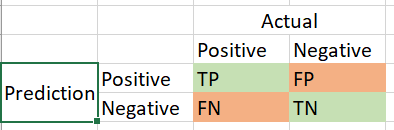  
- What is TP + FN and FP + TN?
- What is TP + FP and FN + TN?
- When the total of actual positives is not close to the total of actual negatives, the dataset is `imbalanced`
- If p increases, FN increases and FP decreases. Inverse is also true
- Accuracy = $\frac{TP + TN}{TP + FP + TN + FN}$
- when the dataset is imbalanced, or where one kind of mistake (FN or FP) is more costly than the other it is better to optimize for one of the other metrics
- What is model accuracy for a trivial model that predicts that customer will not default on `Default` dataset?
- Recall or (True Positive Rate - TPR) </br>
  Recall = $\frac{TP}{TP + FN}$ </br>
  Also called `detection rate`...........what proportion of positive's were identified correctly. This metric should be used for `Default` dataset
- Precision is the proportion of all the model's positive classifications that are actually positive </br>
    Precision = $\frac{TP}{TP + FP}$ </br>
    precision measures the fraction of emails classified as spam that were actually spam
- Precision and Recall are generally in inverse relation
- The F1 score is the harmonic mean (a kind of average) of precision and recall
  F1 = $\frac{2 * Precision * Recall}{Precision + Recall}$ </br>
  This metric balances the importance of precision and recall, and is preferable to accuracy for class-imbalanced datasets

In [8]:
print(classification_report(df['default'], y_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.98      9667
         Yes       0.65      0.26      0.37       333

    accuracy                           0.97     10000
   macro avg       0.81      0.63      0.68     10000
weighted avg       0.96      0.97      0.96     10000



## LDA (Linear Discriminant Analysis)   
- If we assume that X's follow a multivariate Gaussian distribution (with a class-specific mean vector and a common variance matrix). then the model that we get is called LDA.
- With above assumption and some manipulation we get
  $δ_k(x) = x^TΣ^{−1}μ_k − \frac{1}{2}μ^{T}_kΣ^{−1}μ_k + log π_k$ </br>
  We assign class k for which $δ_k$ is the largest. $δ_k$ is also called the `discriminant` function and $δ_k$ is linear in x and hence the name LDA.
- If class has its own covariance matrix then we get `QDA (Quadratic Discriminant Analysis)`.

In [9]:
## Implement LDA on Default dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis